**The target of this notebook is to deal with a student droupout dataset to predict a studet will droupout from university or not**

# Importing packages and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [25]:
df = pd.read_csv('student_dropout.csv')

In [7]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [23]:
print(df['Application order'].unique())

[5 1 2 4 3 6 9 0]


In [22]:
print(df["GDP"].unique())

[ 1.74  0.79 -3.12 -0.92 -4.06  3.51 -1.7   2.02  0.32  1.79]


In [9]:
# number of rows and columns
df.shape

(4424, 37)

In [10]:
# check for missing values
df.isna().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance\t,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


In [11]:
# check for duplicates
df.duplicated().sum()

0

# Feature Analysis

In [12]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


<ipython-input-14-d73787c20512>:3: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


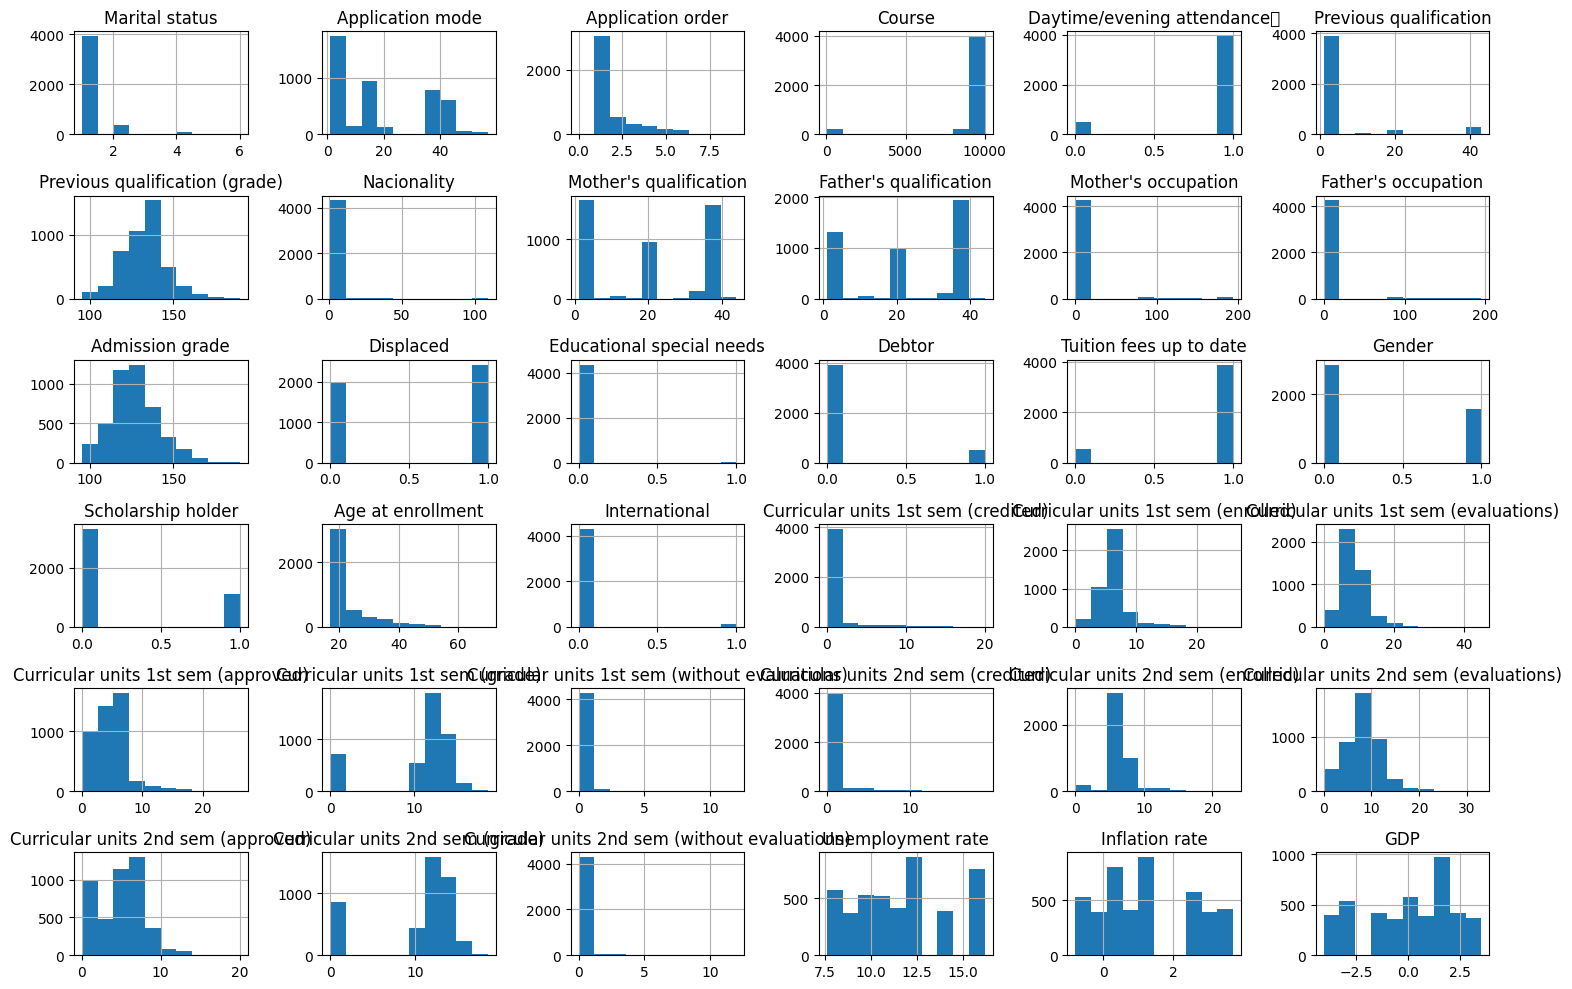

In [14]:
# features distributions plotting
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

## Correlation Matrix with Filtering

In [15]:
corr_matrix = df.corr(numeric_only=True,method='pearson')

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


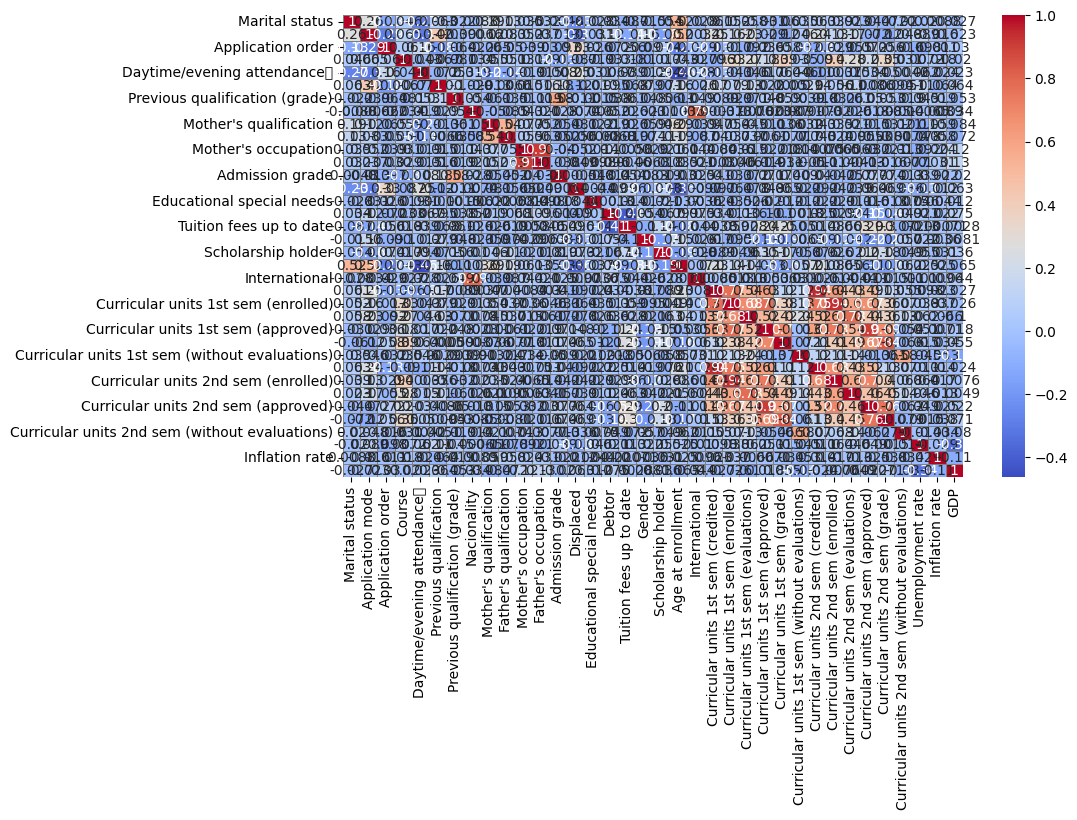

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',linewidths=.5, linecolor='gray')
plt.show()

In [17]:
corr_matrix2 = corr_matrix[corr_matrix > 0.8]

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


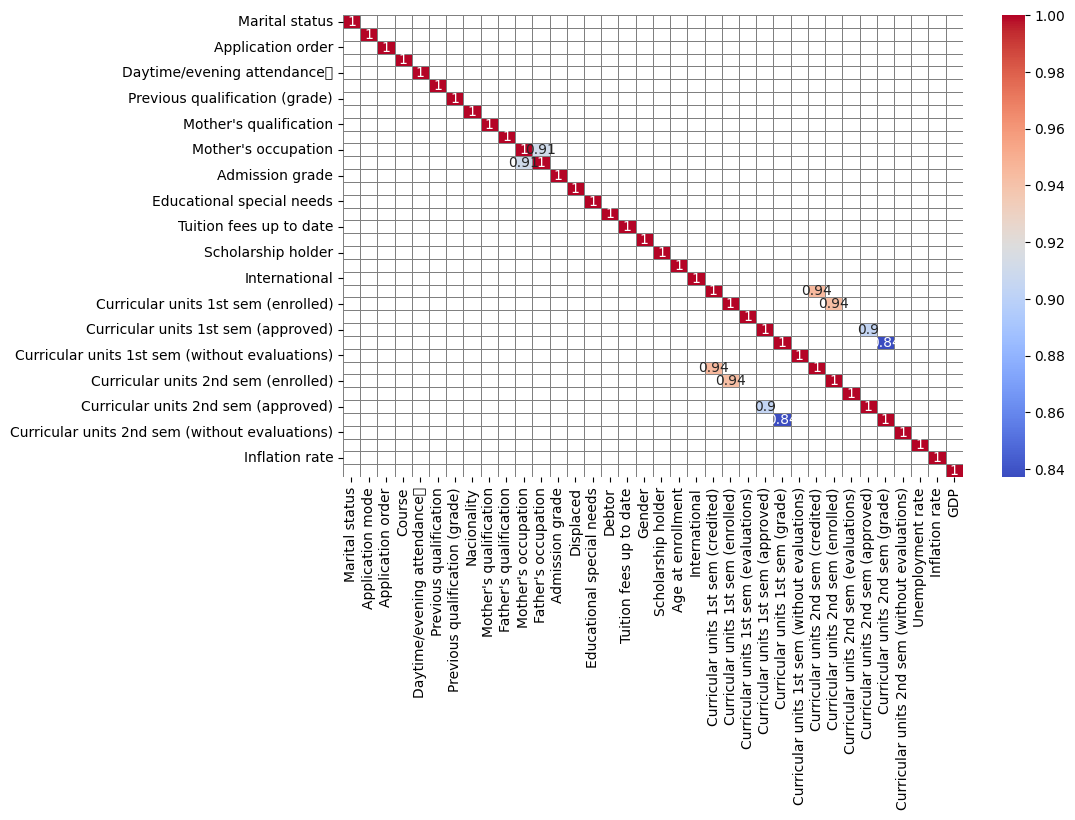

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm',linewidths=.5, linecolor='gray')
plt.show()

In [20]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [26]:
df.drop(['Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (approved)' ,
         "Mother's qualification", "Father's occupation"], inplace=True,axis=1)

## Data preprocessing - Encoding

In [26]:
df.Target.value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


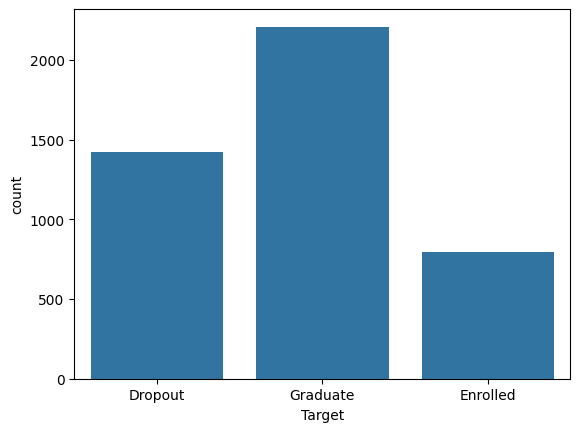

In [27]:
sns.countplot(data=df, x='Target')
plt.show()

In [27]:
df['Target'] = df.Target.map({'Dropout':1,'Enrolled':0, 'Graduate':0})

In [29]:
df.Target.value_counts(normalize=True)

,proportion
Target,
0,0.678797
1,0.321203


**The difference between the two classes is 0.68 - 0.32 = 0.36, which is greater than 0.2, so the data is imbalanced**

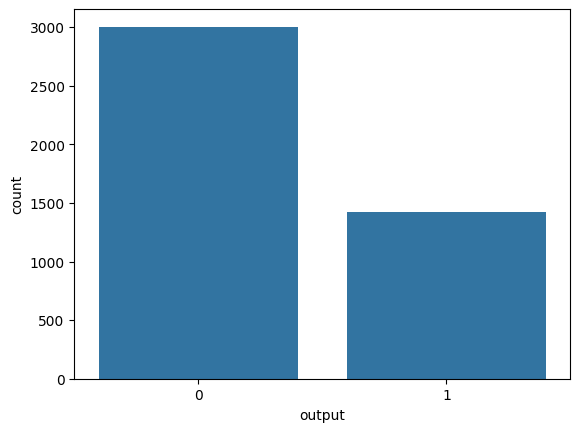

In [32]:
sns.countplot(data=df, x='output')
plt.show()

In [35]:
df.corr(numeric_only=True)['output'].sort_values(ascending=False)

,output
output,1.000000
Age at enrollment,0.254215
Debtor,0.229407
Gender,0.203983
Application mode,0.198458
Marital status,0.093712
Curricular units 2nd sem (without evaluations),0.079901
Curricular units 1st sem (without evaluations),0.054230
Previous qualification,0.049379
Inflation rate,0.027826


In [34]:
import pandas as pd

def get_int_columns(df):
  int_cols = []
  for col in df.columns:
    if df[col].dtype == int:
      unique_values = df[col].unique()
      if len(unique_values) > 2 or (len(unique_values) == 2 and not (0 in unique_values and 1 in unique_values)):
        int_cols.append(col)
  return int_cols

int_columns = get_int_columns(df)
print(int_columns)

['Marital status', 'Application mode', 'Application order', 'Course', 'Previous qualification', 'Nacionality', "Father's qualification", "Mother's occupation", 'Age at enrollment', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)']


In [31]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [32]:
from category_encoders.binary import BinaryEncoder

In [37]:
# Create a BinaryEncoder object
encoder = BinaryEncoder(cols=df[int_columns])

# Fit and transform the data
encoded_data = encoder.fit_transform(df)
encoded_data.head(10)

,Marital status_0,Marital status_1,Marital status_2,Application mode_0,Application mode_1,Application mode_2,Application mode_3,Application mode_4,Application order_0,Application order_1,...,Curricular units 2nd sem (approved)_4,Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)_0,Curricular units 2nd sem (without evaluations)_1,Curricular units 2nd sem (without evaluations)_2,Curricular units 2nd sem (without evaluations)_3,Unemployment rate,Inflation rate,GDP,Target
0,0,0,1,0,0,0,0,1,0,0,...,1,0.000000,0,0,0,1,10.8,1.4,1.74,1
1,0,0,1,0,0,0,1,0,0,0,...,0,13.666667,0,0,0,1,13.9,-0.3,0.79,0
2,0,0,1,0,0,0,1,1,0,0,...,1,0.000000,0,0,0,1,10.8,1.4,1.74,1
3,0,0,1,0,0,0,0,1,0,0,...,1,12.400000,0,0,0,1,9.4,-0.8,-3.12,0
4,0,1,0,0,0,1,0,0,0,0,...,0,13.000000,0,0,0,1,13.9,-0.3,0.79,0
5,0,1,0,0,0,1,0,0,0,0,...,1,11.500000,0,0,1,0,16.2,0.3,-0.92,0
6,0,0,1,0,0,0,1,1,0,0,...,0,14.345000,0,0,0,1,15.5,2.8,-4.06,0
7,0,0,1,0,0,1,0,1,0,1,...,1,0.000000,0,0,0,1,15.5,2.8,-4.06,1
8,0,0,1,0,0,0,1,1,0,1,...,0,14.142857,0,0,0,1,16.2,0.3,-0.92,0
9,0,0,1,0,0,0,1,1,0,0,...,1,13.500000,0,0,0,1,8.9,1.4,3.51,1


# Splitting Data

In [70]:
x_train, x_test, y_train, y_test = train_test_split(encoded_data.drop(['Target'],axis=1), encoded_data.Target, test_size=0.2)

In [71]:
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)

In [79]:
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Data Scaling

**Float type columns**

In [48]:
floated = list()
for col in x_train.columns:
  if x_train[col].dtype == float:
    floated.append(col)

print(floated)

['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']


In [72]:
scaler = RobustScaler(quantile_range=(20, 80))

x_train_scaled = scaler.fit_transform(x_train[floated])

x_test_scaled = scaler.transform(x_test[floated])


In [57]:
x_train_scaled

array([[-0.58421053, -0.28251121, -0.29379602, ...,  0.32      ,
         0.79310345, -0.4114053 ],
       [ 1.15263158,  1.84304933, -4.07523511, ...,  0.56      ,
        -0.5862069 ,  0.09572301],
       [-0.16315789, -0.04932735,  0.49566232, ...,  0.88      ,
         0.48275862, -0.89205703],
       ...,
       [-0.68947368, -0.28251121, -0.59233069, ...,  0.32      ,
         0.79310345, -0.4114053 ],
       [-0.9       , -0.49327354, -0.09477291, ..., -0.44      ,
         0.        ,  0.6496945 ],
       [ 0.36315789,  0.0941704 ,  0.15874462, ..., -0.06      ,
         0.        ,  0.2892057 ]])

In [73]:
test_df = pd.DataFrame(x_test_scaled, columns=floated)
train_df = pd.DataFrame(x_train_scaled, columns=floated)


In [74]:
train_df

,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
0,0.000000,-1.144737,-4.057494,-3.340909,1.02,-0.379310,-0.252546
1,-1.110526,-0.877193,-4.057494,-3.340909,0.00,-0.275862,0.346232
2,0.310526,0.307018,0.054831,0.659091,-0.70,0.413793,0.000000
3,0.000000,-1.105263,-4.057494,-3.340909,0.88,0.482759,-0.892057
4,0.363158,0.609649,-4.057494,-3.340909,0.56,-0.586207,0.095723
...,...,...,...,...,...,...,...
3534,0.000000,-0.486842,-0.328986,0.295455,0.32,0.793103,-0.411405
3535,-0.636842,-0.469298,-0.119062,-0.075974,0.32,0.793103,-0.411405
3536,0.889474,0.219298,-0.219324,0.113636,-0.70,0.413793,0.000000
3537,-1.636842,-1.118421,0.142561,-0.033117,0.26,-0.310345,0.299389


In [75]:
x_train_new = pd.concat([x_train.drop(floated, axis=1), train_df], axis=1)
x_test_new = pd.concat([x_test.drop(floated, axis=1), test_df], axis=1)


In [76]:
x_test_new.head()

,Marital status_0,Marital status_1,Marital status_2,Application mode_0,Application mode_1,Application mode_2,Application mode_3,Application mode_4,Application order_0,Application order_1,...,Curricular units 2nd sem (without evaluations)_1,Curricular units 2nd sem (without evaluations)_2,Curricular units 2nd sem (without evaluations)_3,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,-0.636842,-0.622807,-4.057494,-3.340909,0.32,0.793103,-0.411405
1,0,0,1,0,0,1,1,0,0,0,...,0,0,1,0.363158,0.390351,0.013708,0.095455,-0.44,0.000000,0.649695
2,0,0,1,0,1,1,0,1,0,0,...,0,0,1,-0.584211,-0.285088,0.000000,0.159091,0.26,-0.310345,0.299389
3,0,0,1,0,0,0,1,1,0,1,...,0,0,1,0.100000,0.162281,0.153527,0.136364,0.88,0.482759,-0.892057
4,0,0,1,0,0,0,1,1,0,0,...,0,0,1,0.205263,0.293860,0.328986,-0.122727,-0.70,0.413793,0.000000


# Baseline models

In [91]:
models = [LogisticRegression(max_iter=500,random_state=7), SVC(random_state=7), KNeighborsClassifier(), DecisionTreeClassifier(random_state=7), RandomForestClassifier(random_state=89)]

for model in models:
  model.fit(x_train_new, y_train)
  y_pred = model.predict(x_test_new)
  print(f'{model.__class__.__name__}: {accuracy_score(y_test, y_pred)}')

LogisticRegression: 0.8621468926553673
SVC: 0.8757062146892656
KNeighborsClassifier: 0.8429378531073446
DecisionTreeClassifier: 0.8090395480225989
RandomForestClassifier: 0.8903954802259887


# Additional Part : Data Resampling and PCA

In [129]:
from imblearn.combine import SMOTEENN

In [135]:
smote = SMOTEENN(sampling_strategy='minority')
x_train_smote, y_train_smote = smote.fit_resample(x_train_new, y_train)

In [130]:
y_train.value_counts()

,count
Target,
0,2404
1,1135


In [136]:
y_train_smote.value_counts()

,count
Target,
1,1986
0,1294


In [137]:
models = [LogisticRegression(max_iter=500,random_state=7), SVC(random_state=7), KNeighborsClassifier(), DecisionTreeClassifier(random_state=7), RandomForestClassifier(random_state=89)]

for model in models:
  model.fit(x_train_smote, y_train_smote)
  y_pred = model.predict(x_test_new)
  print(f'{model.__class__.__name__}: {accuracy_score(y_test, y_pred)}')

LogisticRegression: 0.8056497175141243
SVC: 0.8192090395480226
KNeighborsClassifier: 0.7898305084745763
DecisionTreeClassifier: 0.7728813559322034
RandomForestClassifier: 0.8293785310734463


## Multi-collinearity and PCA

In [140]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = x_train_new

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                             feature        VIF
0                   Marital status_0   1.060451
1                   Marital status_1   5.463511
2                   Marital status_2  48.913038
3                 Application mode_0   1.133392
4                 Application mode_1   1.925499
..                               ...        ...
89  Curricular units 1st sem (grade)   4.279216
90  Curricular units 2nd sem (grade)   6.344539
91                 Unemployment rate   1.468882
92                    Inflation rate   1.117950
93                               GDP   1.397809

[94 rows x 2 columns]


**Interpreting VIF**

* VIF = 1: No correlation between the predictor and other predictors.

* VIF between 1 and 5: Moderate correlation, generally acceptable.

* VIF greater than 5: High correlation, indicating potential multicollinearity.

So, VIF helps identify variables that are essentially redundant in a model due to high correlation with other variables.

In [141]:
from sklearn.decomposition import PCA

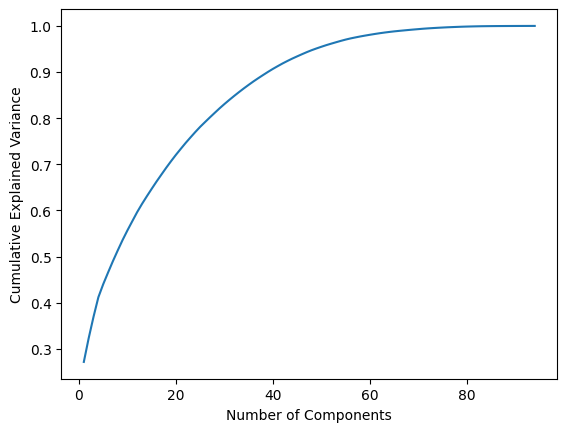

In [151]:

# Sample data
data = x_train_new

pca = PCA()
pca.fit(data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_var_ratio = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()



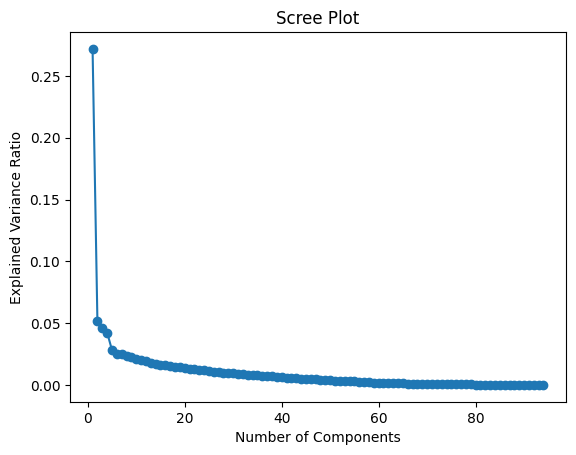

In [152]:
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

In [158]:
# Sample data
data = x_train_new


# Create a PCA object
pca = PCA(n_components=60)  # Specify the number of components

# Fit the PCA model to the data
pca.fit(data)

# Transform the data to the new dimension
principal_components = pca.transform(data)

# Create column names based on principal components
column_names = [f'PC{i+1}' for i in range(pca.n_components_)]  # Dynamic naming

# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=column_names)

(principal_df)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
0,4.936511,-1.213804,0.527007,-0.623726,-0.149366,-0.619168,-0.268719,-0.688590,-0.730433,-0.060286,...,0.130173,-0.271076,-0.011725,-0.132355,-0.431129,-0.435137,0.142543,-0.208300,-0.073494,0.211442
1,4.606087,0.643157,-1.378132,-0.722160,-0.241041,0.351697,0.340191,-0.041978,-0.809847,-0.396197,...,-0.323786,-0.094120,0.010537,0.077898,-0.229341,-0.030424,0.002190,-0.215317,0.074213,0.028277
2,-1.034340,0.633887,-0.289596,0.482175,-0.922706,0.500499,0.769407,0.185027,0.298952,0.159479,...,-0.024519,0.718460,0.005036,-0.352834,-0.196061,-0.163366,-0.026109,-0.087284,-0.181598,-0.005091
3,4.800365,-0.946641,0.224794,-0.253809,0.498931,-0.147961,-0.745297,-1.692562,-0.290038,0.470902,...,0.279662,-0.259785,0.102302,-0.145277,-0.079587,-0.263463,0.015271,-0.199282,0.178900,0.277104
4,4.485837,0.805357,1.611921,-0.555273,0.821232,0.122665,-0.356015,-0.837972,0.490549,-0.570104,...,0.086567,0.121137,-0.222752,-0.125521,-0.204700,0.130135,-0.075816,-0.076866,-0.164116,-0.250226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,-0.523487,0.301903,-0.306089,-0.141282,-0.281308,0.105294,0.554297,0.404540,-0.265579,1.115448,...,0.183629,-0.876222,0.021457,0.361290,0.165300,0.349142,-0.155630,-0.060009,-0.047711,-0.013636
3535,-0.868477,0.487945,0.194883,-1.911673,-0.259740,-0.470096,-0.896958,-0.264233,0.089945,0.223016,...,-0.135650,0.111680,0.068014,0.170886,-0.164641,-0.146257,-0.269951,0.089142,0.049528,0.107122
3536,-0.517921,0.428119,-0.223038,0.995646,0.120045,-0.801539,0.562367,0.775273,0.681112,-0.467911,...,-0.133301,-0.098960,-0.044107,0.120895,-0.137650,0.049364,-0.225828,0.405688,-0.187674,-0.065075
3537,-1.133506,0.619754,-1.414846,-2.082286,-0.215527,0.551173,-0.174539,-0.361628,-0.384541,-0.168132,...,0.105710,0.103700,0.071181,0.132485,-0.191570,0.066165,-0.140095,0.200504,0.050029,-0.006324


In [159]:
x_test_pca = pca.transform(x_test_new)

In [166]:
log_reg_pca = LogisticRegression(max_iter= 300)
log_reg_pca.fit(principal_df, y_train)
predcs_pca = log_reg_pca.predict(x_test_pca)
print('accuracy_score ',accuracy_score(y_test, predcs_pca))

accuracy_score  0.8666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
